<center><h1>EDA ON GRADUATE ADMISSION DATASET</h1></center>

In [176]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

## Load the Dataset.

In [177]:
# Import Dataset
admission_data = pd.read_csv("admission_data.csv")
admission_data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [178]:
admission_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


Let's explore the columns available and check for null values.

In [179]:
admission_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

There are unnecessary space after `LOR` and `Chance of Admit ` columns.
Let's fix it

In [180]:
admission_data=admission_data.rename(columns={"LOR ":"LOR", 
                               "Chance of Admit ":"Chance of Admit"})

In [181]:
admission_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [182]:
admission_data.shape

(500, 8)

**`Observations`**

The admission_data dataset contains `500` rows and `8` columns.

In [183]:
admission_data["Chance of Admit"] = np.where()

TypeError: where() missing 1 required positional argument: 'condition'

## Dealing with null values

In [184]:
admission_data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no null values, the admission_data dataset is clean.

In [185]:
# Let's check the datatypes of the respective columns.
admission_data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

**`Observations`**

There are only numeric values in our dataset.


# Exploring Data

In [186]:
admission_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [187]:
admission_data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [188]:
# Frequent values from Research
research_values = admission_data['Research'].value_counts()
plt.figure(figsize=(4, 6))

fig = px.bar(research_values,
             x=research_values.keys(),
             y=research_values.values,
             labels={'index': 'No. of Research',
                     'y': 'Count'},
             title='Number of Research Frequency',
             height=450,
             width=750
             );
fig.show();

<Figure size 288x432 with 0 Axes>

Only `280` profiles out of 500 have a Research background.

In [189]:
admission_data["Research"].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [190]:
##### Frequent values from Research column
gre_values = admission_data["University Rating"].value_counts()
plt.figure(figsize=(4, 6));

fig = px.bar(gre_values,
             x=gre_values.keys(),
             y=gre_values.values,
             labels={'index': 'Rank of University',
                     'y': 'Count'},
             title='Number of Ratings Frequency',
             height=450,
             width=750
             );
fig.show();

<Figure size 288x432 with 0 Axes>

34 Universities have rating 1.<br>
126 Universities have rating 2.<br>
162 Universities have rating 3.<br>
105 Universities have rating 4.<br>
73 Universities have rating 5.

In [191]:
admission_data["Research"].value_counts()

1    280
0    220
Name: Research, dtype: int64

The `University Rating` has a rating scale 1 to 5

In [192]:
#admission_data["SOP"].value_counts()

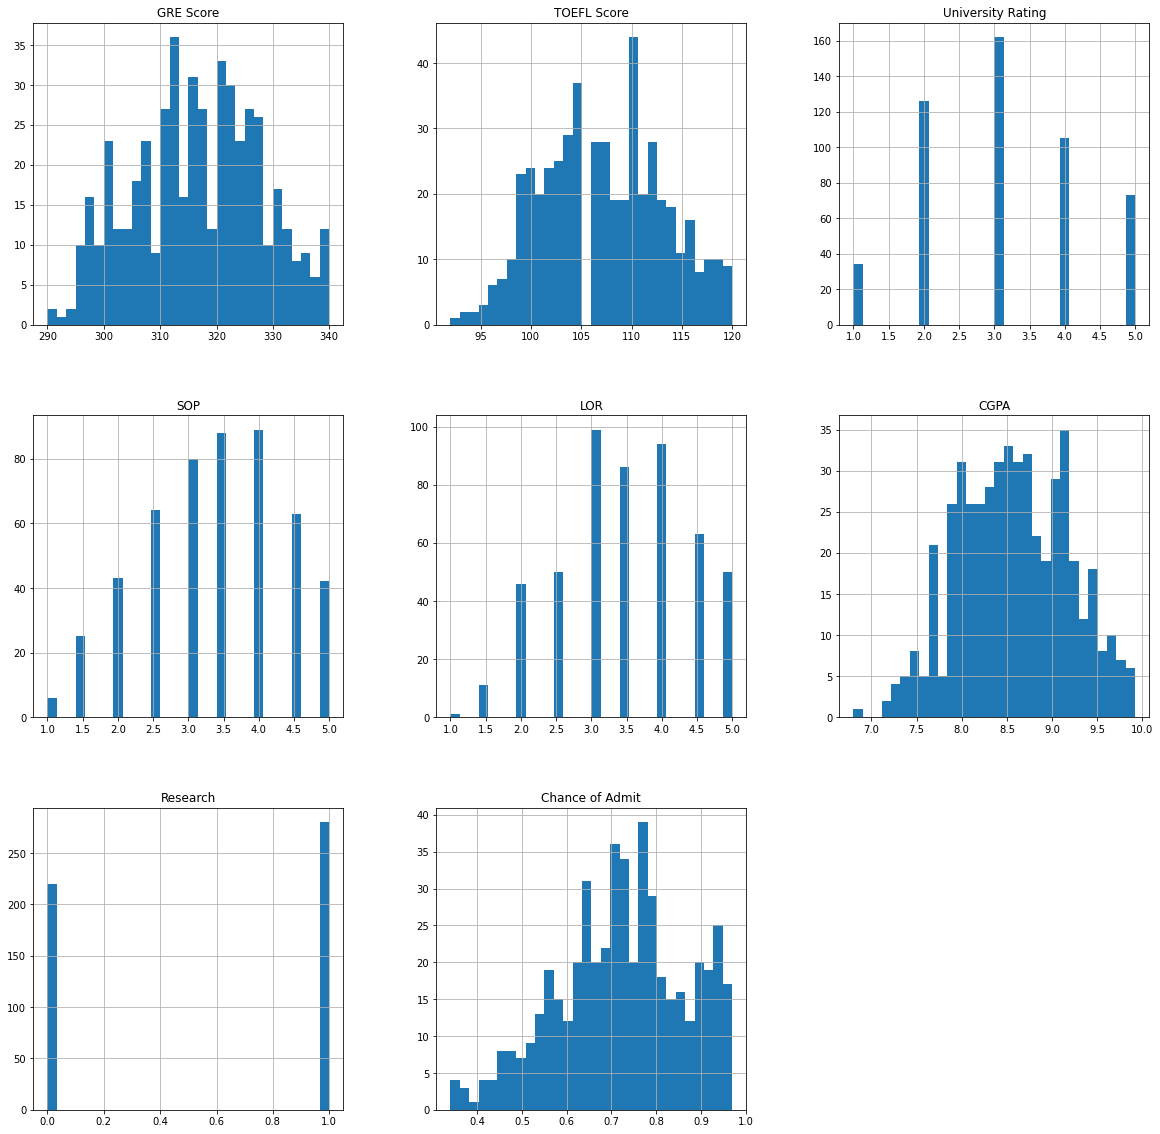

In [193]:
admission_data.hist(bins=30, figsize=(20,20));

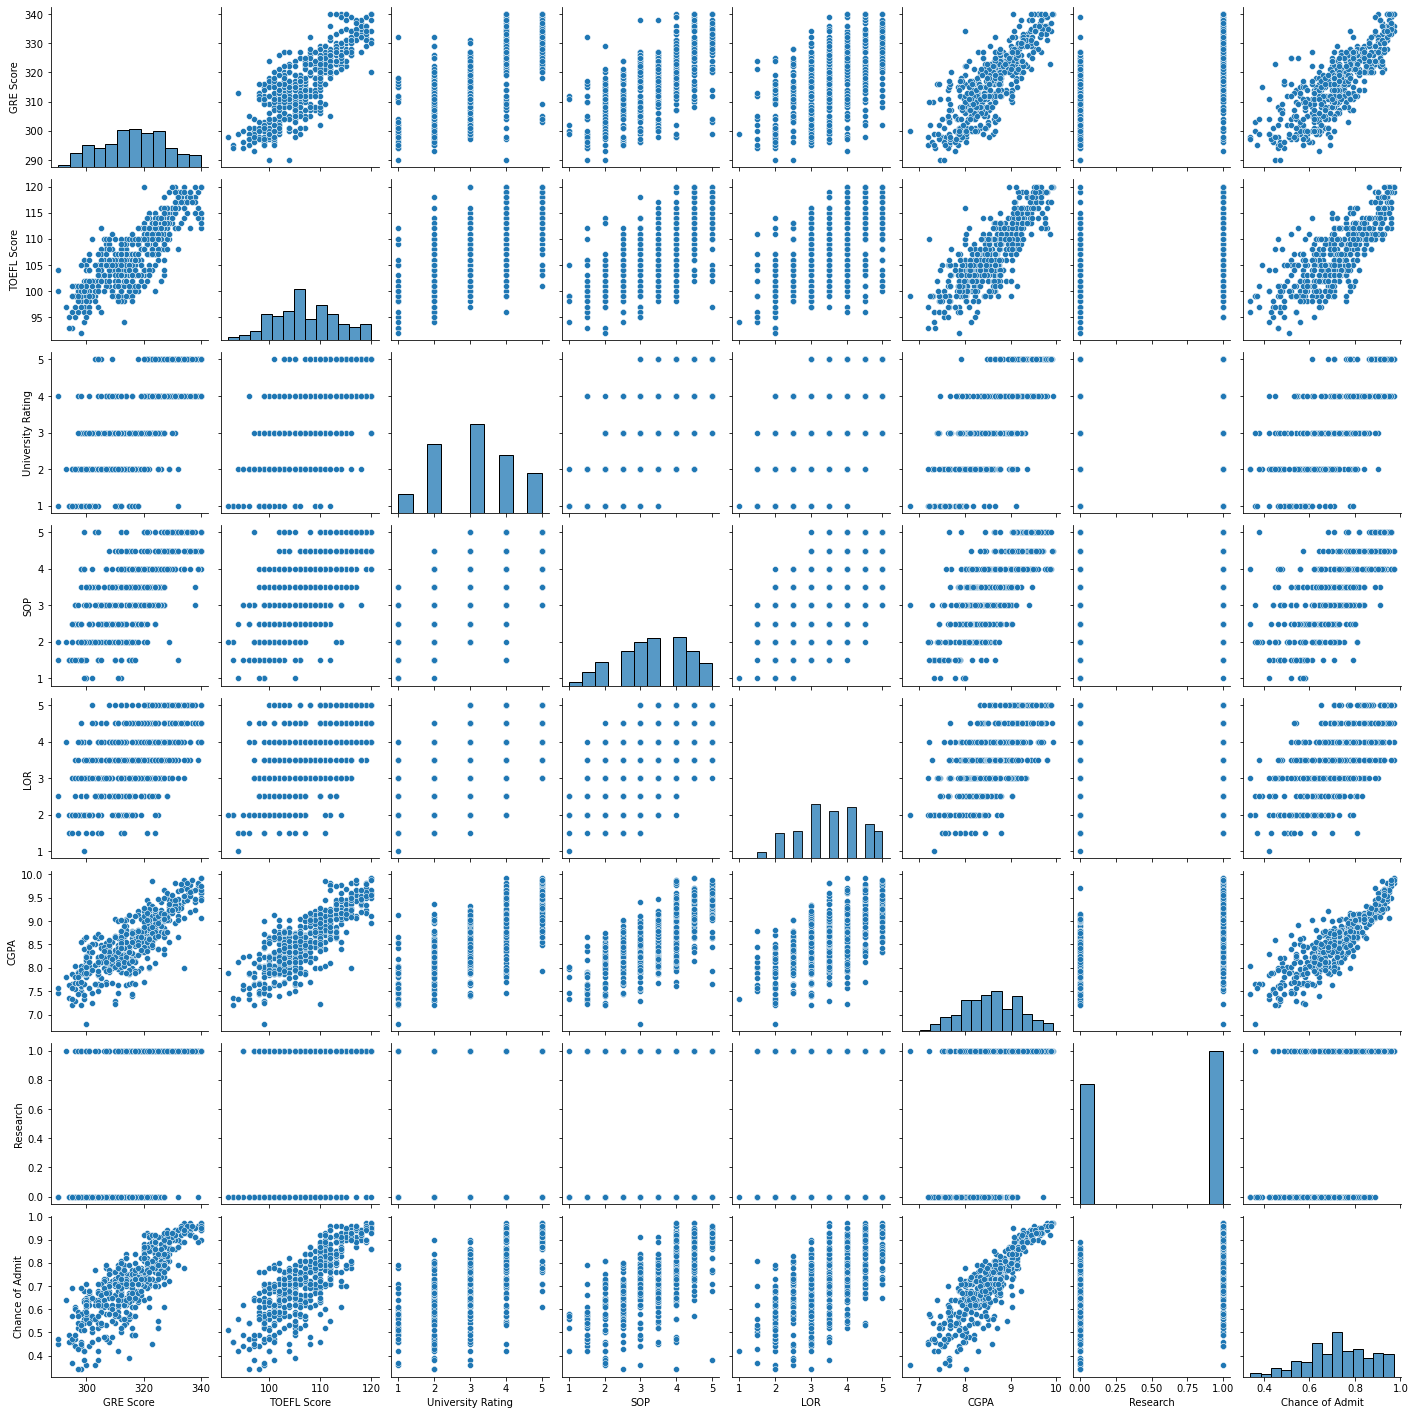

In [194]:
sns.pairplot(admission_data);

## Data Visualization

In [195]:
admission_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


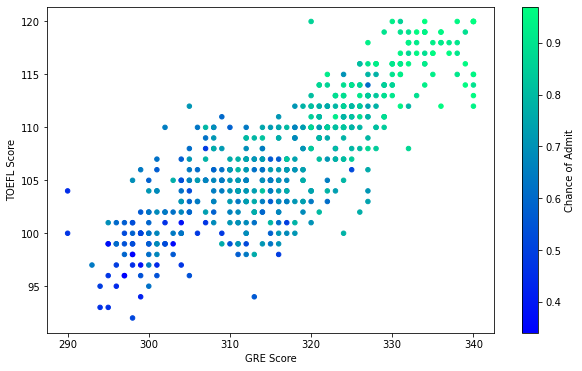

In [196]:
fig, ax = plt.subplots(figsize=(10,6))
admission_data.plot(kind='scatter', 
                    x="GRE Score",
                    y="TOEFL Score",
                    c = "Chance of Admit",
                    ax = ax,
                    cmap="winter");

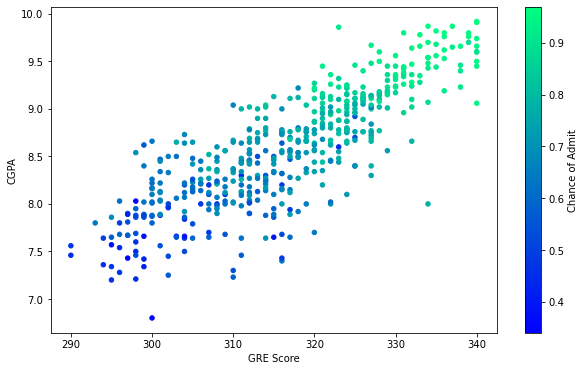

In [197]:
fig, ax = plt.subplots(figsize=(10,6))
admission_data.plot(kind='scatter', 
                    x="GRE Score",
                    y="CGPA",
                    c = "Chance of Admit",
                    ax = ax,
                    cmap="winter");

`Observations` 

Higher the values of `CGPA`, `GRE Score` and `TOFEL Score` higher is the `Chance of Admit`, so there is a high correlation between them. 

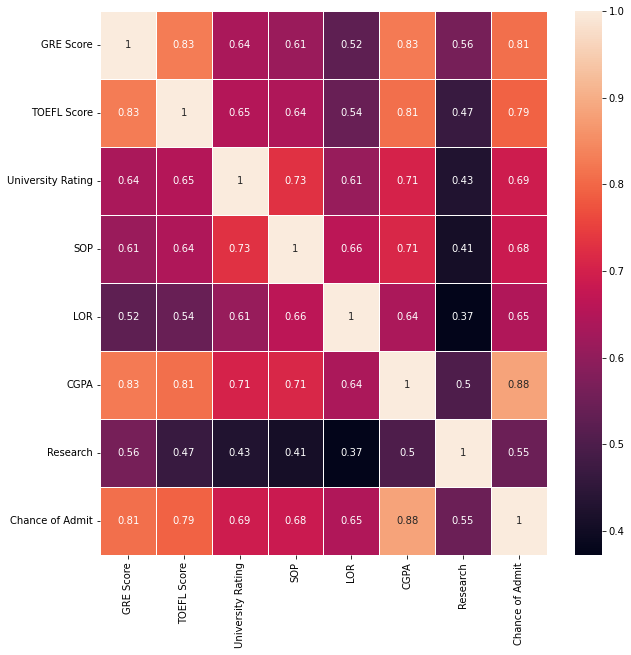

In [198]:
#Lets make a heat map for more specific correlations
plt.figure(figsize=(10,10))
sns.heatmap(admission_data.corr(), linewidths=0.5, annot=True)
plt.show();

**`Observations`**

* `GRE Score`, `TOEFL Score`, `CGPA` have a high correlation with  `Chance of Admit`.

* `University Rating` and `SOP` have a positive correlation.

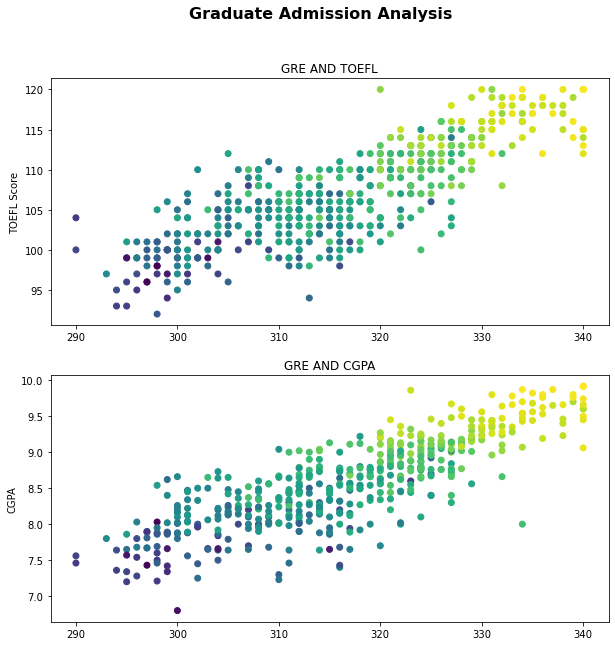

In [199]:
# Lets plot some visulizations for CGPA, GRE, and TOEFL

# Subplots of CGPA, GRE Score, TOEFL Score 
fig, (ax0, ax1) = plt.subplots(nrows=2,
                                 ncols=1,
                                 figsize=(10,10))

# Add data to ax0
scatter = ax0.scatter(x=admission_data["GRE Score"],
                      y=admission_data["TOEFL Score"],
                      c=admission_data["Chance of Admit"]);

# Customize ax0
ax0.set(title="GRE AND TOEFL",
       ylabel="TOEFL Score")


# Add data to ax1
scatter = ax1.scatter(x=admission_data["GRE Score"],
                      y = admission_data["CGPA"],
                      c = admission_data["Chance of Admit"]);

# Customize ax1
ax1.set(title="GRE AND CGPA",
        ylabel = "CGPA");

# Add a title to the figure
fig.suptitle("Graduate Admission Analysis", fontsize=16, fontweight='bold');


<AxesSubplot:xlabel='Research', ylabel='Count'>

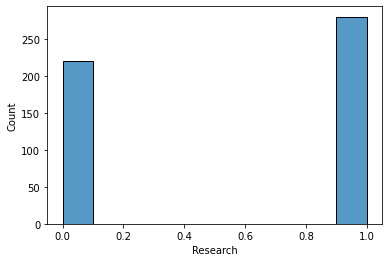

In [200]:
#admission_data.plot(x="Research", y ="Chance of Admit", kind="scatter");
sns.histplot(admission_data['Research'])

There is no significant affect of only research papers with respect to 
the `Chance of Admit`.

# Regression Estimators

In [202]:
# Create X (features matrix) and y(target)
X = admission_data.drop("Chance of Admit", axis=1)
y = admission_data["Chance of Admit"]

X = np.array(X)
y = np.array(y)
y = y.reshape(-1,1)

In [203]:
# Import algorithm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Setup random set
np.random.seed(42)

#Scaling the data before training the model
scalar_x = StandardScaler()
scalar_y = StandardScaler()
X = scalar_x.fit_transform(X)
y = scalar_y.fit_transform(y) 


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

# Instantiate and fit the model.
lr = LinearRegression()
lr.fit(X_train, y_train)

# Check the score of the model (on test set)
lr_predict = lr.predict(X_test)

train_error_lr = lr.score(X_train,y_train)
test_error_lr = lr.score(X_test,y_test)
print("Training Error is",train_error_lr)
print("Test Error is",test_error_lr)

Training Error is 0.8210671369321554
Test Error is 0.8188432567829627


In [204]:
cross_val_score(model, X, y, cv=10)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Megha Thorat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Megha Thorat\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 573, in fit
    y = self._validate_y(y, sample_weight)
  File "C:\Users\Megha Thorat\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 1369, in _validate_y
    check_classification_targets(y)
  File "C:\Users\Megha Thorat\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 200, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


In [205]:
np.mean(cross_val_score(model, X, y, cv=10))

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Megha Thorat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Megha Thorat\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 573, in fit
    y = self._validate_y(y, sample_weight)
  File "C:\Users\Megha Thorat\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 1369, in _validate_y
    check_classification_targets(y)
  File "C:\Users\Megha Thorat\anaconda3\lib\site-packages\sklearn\utils\multiclass.py", line 200, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


In [206]:
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor

models = {'LinearRegressor': LinearRegression(),
          'SVR': svm.SVR(),
          'KNeighborsRegressor': KNeighborsRegressor(),
          'RandomForestRegressor': RandomForestRegressor(),
          'AdaBoost Regressor': AdaBoostRegressor(),
          'GradientBoosting Regressor': GradientBoostingRegressor(),
          'XGBoost Regressor':XGBRegressor()}

train_r2_scores = []
test_r2_scores = []

for name, model in models.items():
    print(f'Training model with {name} ...')
    model.fit(X_train, y_train)
    print(f'Scoring on train & test with {name} ...\n')
    train_r2_scores.append(model.score(X_train, y_train))
    test_r2_scores.append(model.score(X_test, y_test))

Training model with LinearRegressor ...
Scoring on train & test with LinearRegressor ...

Training model with SVR ...
Scoring on train & test with SVR ...

Training model with KNeighborsRegressor ...
Scoring on train & test with KNeighborsRegressor ...

Training model with RandomForestRegressor ...
Scoring on train & test with RandomForestRegressor ...

Training model with AdaBoost Regressor ...
Scoring on train & test with AdaBoost Regressor ...

Training model with GradientBoosting Regressor ...
Scoring on train & test with GradientBoosting Regressor ...

Training model with XGBoost Regressor ...
Scoring on train & test with XGBoost Regressor ...



## Visualizing Results
Let's try to visualize the results for better and clear understanding. For this I created a DataFrame using the list of train and test results we stored earlier.

In [207]:
results = pd.DataFrame(index=models.keys(), data={'Train score': train_r2_scores,
                                                  'Test score': test_r2_scores})
results

,Train score,Test score
LinearRegressor,0.821067,0.818843
SVR,0.856517,0.800379
KNeighborsRegressor,0.857702,0.784804
RandomForestRegressor,0.968444,0.790674
AdaBoost Regressor,0.823269,0.746309
GradientBoosting Regressor,0.925096,0.780800
XGBoost Regressor,0.999889,0.743187


### Regression model evaluation metrices

The ones we're going to perform are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)
    
**R<sup>2</sup>**

What R-squared does: Compares your model predictions to the mean of the targets. Values can range from negative infinity ( a very poor model) to 1. For example, if all your model does is predict the mean of  the target, it's R^2  value would be 0. And if your model predicts a range of numbers it's R^2 value would be 1.

**Mean Absolute error (MAE)**

MAE is the average of the absolute differences between predictions and actual values.

It gives you an idea of how wrong your models predictions are.


**Mean squared error (MSE)**

MSE is the mean of the square of the errors between the actual and predicted values

In [208]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error  
y_preds = models['RandomForestRegressor'].predict(X_test)
print('R2 score: ', r2_score(y_true = y_test, y_pred = y_test))
print('MAE: ', mean_absolute_error(y_test, y_preds))
print('MSE: ', mean_squared_error(y_test, y_preds))

R2 score:  1.0
MAE:  0.31044858554147914
MSE:  0.21531963717868421


## Hyperparameter tuning

In [209]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 200, 500, 1000],
          'max_samples': [100, 200, 500, 1000], 
          'max_depth': [5, 10, 15, 25, 50]}

grid_search_reg = GridSearchCV(models['RandomForestRegressor'], param_grid=params, n_jobs=-1, cv=5, verbose=True)
grid_search_reg.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 25, 50],
                         'max_samples': [100, 200, 500, 1000],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=True)

In [210]:
from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(X_train, y_train)
accuracy_decisionTree = decisionTree_model.score(X_test, y_test)
accuracy_decisionTree

0.5805378973105134

In [211]:
y_pred = reg2.predict(X_test)
y_pred

NameError: name 'reg2' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

# Classification Models

* Let's convert Continuous data(Chance of Admit) to categorical for Classification Estimators

In [223]:

admission_data["Chance of Admit"] =np.where(admission_data["Chance of Admit"]>0.72, 1,admission_data["Chance of Admit"])

admission_data["Chance of Admit"] =np.where(admission_data["Chance of Admit"]<=0.72, 0,admission_data["Chance of Admit"])
admission_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0


In [224]:
def preprocess(df):
    df = df.copy()

    #split into target variable y and dependent variables x
    Y = df["Chance of Admit"]
    X = df.drop("Chance of Admit", axis=1)

    #train test split
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, train_size=0.5, shuffle=True, random_state=42)

    #scaling the dependent variables X
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = pd.DataFrame(scaler.transform(Xtrain),index=Xtrain.index,columns=Xtrain.columns)
    Xtest = pd.DataFrame(scaler.transform(Xtest),index=Xtest.index,columns=Xtest.columns)

    return Xtrain, Xtest, Ytrain, Ytest

In [222]:
Xtrain, Xtest, Ytrain, Ytest = preprocess(admission_data)
display(Xtrain, Ytrain, Xtest)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
469,0.766904,1.006522,0.721522,0.584772,-0.021181,0.904174,0.823318
296,-0.678721,-0.109710,-0.158383,0.077157,-0.021181,0.096346,-1.214598
474,-0.859424,-0.428633,0.721522,-0.430457,-1.080227,-1.090667,0.823318
198,-0.588369,-0.588095,-0.158383,1.092386,1.037865,-0.299325,-1.214598
297,0.224795,1.963293,-0.158383,0.584772,1.037865,0.821743,-1.214598
...,...,...,...,...,...,...,...
106,1.037959,0.528137,0.721522,1.092386,1.037865,0.937147,0.823318
270,-1.040127,-0.428633,-1.038288,-0.938072,-0.550704,-0.645537,0.823318
348,-1.401534,-1.385404,-1.918194,-1.445686,-1.609750,-2.244708,-1.214598
435,-0.769073,-0.428633,-1.038288,-0.938072,0.508342,-1.535797,-1.214598


469    1.0
296    1.0
474    0.0
198    0.0
297    1.0
      ... 
106    1.0
270    0.0
348    0.0
435    0.0
102    0.0
Name: Chance of Admit, Length: 250, dtype: float64

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,1.489717,1.325446,0.721522,0.584772,-0.021181,1.530654,0.823318
73,-0.317315,0.049752,0.721522,1.092386,0.508342,0.706339,0.823318
374,-0.226963,-0.428633,-1.038288,-1.445686,-1.080227,-1.585256,-1.214598
155,-0.498018,0.209214,-0.158383,-0.430457,-0.550704,0.129319,-1.214598
104,0.766904,0.687599,-0.158383,0.077157,-0.550704,0.722825,0.823318
...,...,...,...,...,...,...,...
103,-0.046260,-0.588095,-1.038288,1.092386,0.508342,-0.233380,-1.214598
81,2.031826,1.963293,0.721522,1.600001,1.567389,1.464708,0.823318
38,-1.220831,-0.428633,-1.918194,-0.430457,-2.139274,-1.832551,-1.214598
314,-1.130479,-0.428633,-1.038288,-0.430457,0.508342,-0.793914,-1.214598


In [226]:
Ytrain

469    1.0
296    1.0
474    0.0
198    0.0
297    1.0
      ... 
106    1.0
270    0.0
348    0.0
435    0.0
102    0.0
Name: Chance of Admit, Length: 250, dtype: float64

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPClassifier
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(Xtrain, Ytrain)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


In [220]:
for name, model in models.items():
    print (name + ": {:.5f}".format(model.score(Xtrain, Ytrain)))

                   Logistic Regression: 0.88000
                   K-Nearest Neighbors: 0.90000
                         Decision Tree: 1.00000
Support Vector Machine (Linear Kernel): -0.00052
   Support Vector Machine (RBF Kernel): 0.74426
                        Neural Network: 0.89200
                         Random Forest: 1.00000
                     Gradient Boosting: 0.99600


In [ ]:
# svm = SVC()
# svm.fit(Xtrain, Ytrain)
# svm.score(Xtest, Ytest)

# 

In [ ]:
RDF_ensemble = []

for i in range(100):
    RDF_ensemble.append(LinearRegression())
    RDF_ensemble[i].fit(X_train, y_train)

In [ ]:
def predict_ensemble(X_test):
    
    pred = 0
    for i in range(len(RDF_ensemble)):
        pred += RDF_ensemble[i].predict(X_test)
    result = pred/len(RDF_ensemble)
    
    return result

In [ ]:
y_preds = predict_ensemble(X_test)
r2_score(y_test, y_preds)